In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

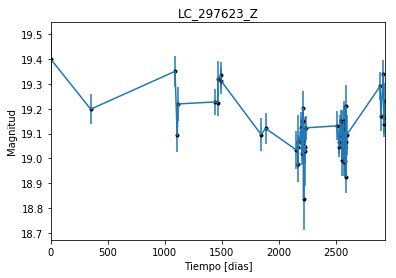

In [2]:
data = np.genfromtxt('LC_297623_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_297623_Z')
plt.savefig("LC_297623_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

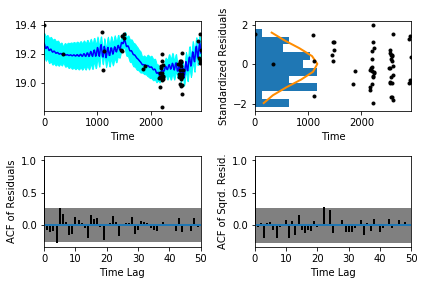

In [5]:
sample.assess_fit()


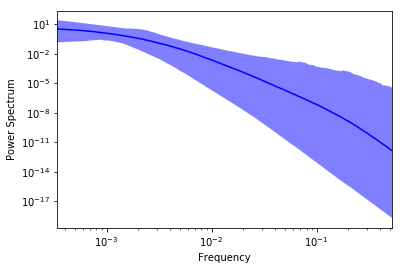

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

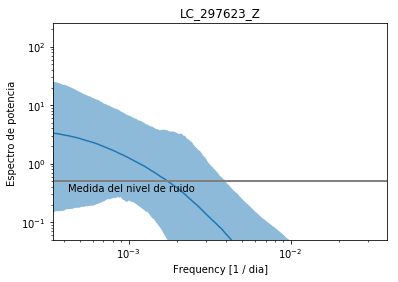

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_297623_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_297623_Z')

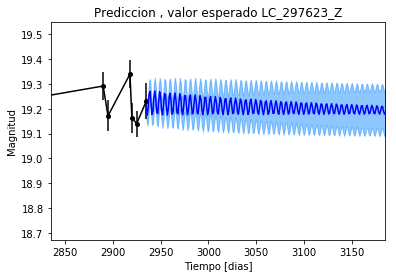

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_297623_Z')

Text(0.5,1,'Prediccion, Caminos simulados_LC_297623_Z')

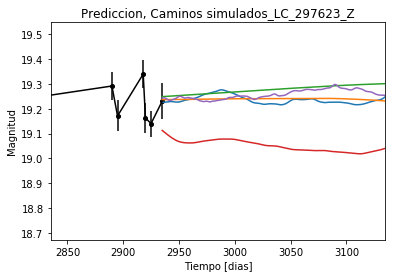

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_297623_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


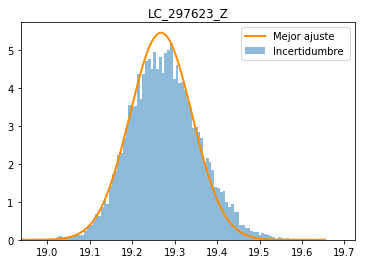

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_297623_Z')
plt.savefig("Mejor_ajuste_LC_297623_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_297623_Z')

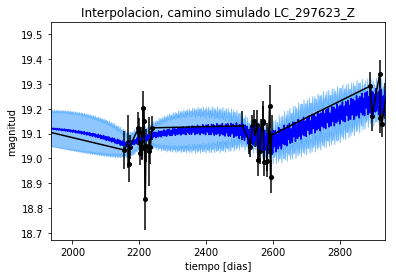

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_297623_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_297623_Z')

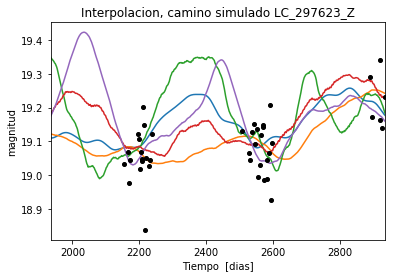

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_297623_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 413.280493632
Median: 0.00884674032922
Standard deviation: 0.190033058367
68% credibility interval: [ 0.00088825  0.15550854]
95% credibility interval: [  3.87167251e-04   7.79642433e-01]
99% credibility interval: [  3.51836669e-04   9.76487876e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 827.662799374
Median: 0.0018993681935
Standard deviation: 0.0604486867206
68% credibility interval: [ 0.0005313   0.02057909]
95% credibility interval: [ 0.00036516  0.19899375]
99% credibility interval: [  3.46472648e-04   4.13653553e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 485.909578488
Median: 0.0166448518589
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 2542.52146684
Median: 79.9719786504
Standard deviation: 1.48613997155
68% credibility interval: [ 78.24259164  80.98054867]
95% credibility interval: [ 75.93487171  81.49746734]
99% credibility interval: [ 74.11035725  81.94175718]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 321.881180951
Median: 0.660476881904
Standard deviation: 2.07808260166
68% credibility interval: [ 0.05758944  3.83967348]
95% credibility interval: [ 0.01489634  6.97758918]
99% credibility interval: [ 0.01030271  9.04552074]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 609.098073932
Median: 0.333130732293
Standard deviation: 7.53821514245
68% credibility interval: [ 0.01505922  5.98624335]
95% credibility interval: [  7.84074853e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 44698.1262158
Median: 1.92547705578e-28
Standard deviation: 4.70116769478e+90
68% credibility interval: [  1.97949052e-75   5.91827660e-04]
95% credibility interval: [  1.01442038e-106   8.97180048e+060]
99% credibility interval: [  1.44398776e-116   4.09467434e+078]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2474.74335703
Median: 19.1825747126
Standard deviation: 0.0554820647165
68% credibility interval: [ 19.13938725  19.23349608]
95% credibility interval: [ 19.09335405  19.31075531]
99% credibility interval: [ 19.04287952  19.39169804]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 1171.09969219
Median: 0.00607979837272
Standard deviation: 0.222260874192
68% credibility interval: [ 0.          0.28431826]
95% credibility interval: [ 0.         0.8400292]
99% credibility interval: [ 0.         1.0146783]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 1171.09969219
Median: 0.00607979837272
Standard deviation: 0.222260874192
68% credibility interval: [ 0.          0.28431826]
95% credibility interval: [ 0.         0.8400292]
99% credibility interval: [ 0.         1.0146783]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 718.453328837
Median: 0.0
Standard deviation: 0.000659119898649
68% credibil

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 2542.52146684
Median: 79.9719786504
Standard deviation: 1.48613997155
68% credibility interval: [ 78.24259164  80.98054867]
95% credibility interval: [ 75.93487171  81.49746734]
99% credibility interval: [ 74.11035725  81.94175718]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1862.39573939
Median: 0.00932740683244
Standard deviation: 0.0139112951396
68% credibility interval: [ 0.00510825  0.01914347]
95% credibility interval: [ 0.0029038   0.04571103]
99% credibility interval: [ 0.0021148   0.08384735]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1612.13477875
Median: 1.16189246042
Standard deviation: 0.178434099722
68% credibility interval: [ 1.00683393  1.35348738]
95% credibility interval: [ 0.86913595  1.57376181]
99% credibility interval: [ 0.80185131  1.71509779]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1529.76207901
Median: 5.52274480878e-05
Standard deviation: 0.106326878394
68% credibility interval: [  3.41325466e-07   3.25048429e-03]
95% credibility interval: [  1.76619999e-64   7.99278804e-02]
99% credibility interval: [  8.01915658e-83   6.85465528e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 413.280493632
Median: (-0.055585708853+0j)
Standard deviation: 1.83736131049
68% credibility interval: [-0.97708899+0.j         -0.00558106-0.01965889j]
95% credibility interval: [ -4.89863788e+00+0.j          -2.43264358e-03-0.00157296j]
99% credibility interval: [ -6.13545427e+00+0.j          -2.21065499e-03-2.22212689j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 827.662799374
Median: (-0.0119340823263+0j)
Standard deviation: 1.44723377373
68% credibility interval: [-0.12930222+0.4225342j  -0.00333827+0.01389586j]
95% credibility interval: [-1.25031463+2.5613723j  -0.00229438+0.01284048j]
99% credibility interval: [ -2.59906192e+00 +5.25863071e+00j  -2.17695185e-03 +2.78639903e-03j]
Posterior summary for paramet